#Data challenge

This assignment approximates a potential situation that you might be tasked with as a data
scientist. A common problem we face is trying to uncover the associations between
our customers’ microbiome and some health or wellness outcome, such as a specific illness of
interest. We have provided you with a dataset consisting of simulated microbiome data, along
with a target outcome. Think of this data as the output of a next-generation RNA-sequencing
pipeline (the measured activity of the microbes found in our customers’ stool samples), and a
binary indicator giving the customer’s response to the question “do you suffer from disease X?”

Time for completion: less than 3 hours 

1.Loading Data
2.Cleaning Data
3.Analysis
4.Modelling
5.Other Ideas
6.Conclusion

## 1. Loading the Data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

df_data = pd.read_csv("C:/Python/Viome/input/data.csv")
df_label = pd.read_csv("C:/Python/Viome/input/labels.csv")
df_id = pd.read_csv("C:/Python/Viome/input/user_ids.csv")

In [2]:
print(type(df_data))

<class 'pandas.core.frame.DataFrame'>


In [3]:
df_data.dtypes

0      int64
1      int64
2      int64
3      int64
4      int64
5      int64
6      int64
7      int64
8      int64
9      int64
10     int64
11     int64
12     int64
13     int64
14     int64
15     int64
16     int64
17     int64
18     int64
19     int64
20     int64
21     int64
22     int64
23     int64
24     int64
25     int64
26     int64
27     int64
28     int64
29     int64
       ...  
970    int64
971    int64
972    int64
973    int64
974    int64
975    int64
976    int64
977    int64
978    int64
979    int64
980    int64
981    int64
982    int64
983    int64
984    int64
985    int64
986    int64
987    int64
988    int64
989    int64
990    int64
991    int64
992    int64
993    int64
994    int64
995    int64
996    int64
997    int64
998    int64
999    int64
Length: 1000, dtype: object

In [4]:
df_data.head()

,0,1,2,3,4,5,6,7,8,9,...,990,991,992,993,994,995,996,997,998,999
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,2510,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,29879,0,11937,0,0,0,...,0,0,418,0,0,0,0,0,0,0
3,0,0,0,0,4745,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## 2. Data Cleaning

a. In this section, I adjust the data so that it correctly reflects microbial activity. Because running a sequencer will result in more reads, the original data does not correctly resemble microbial acticity in relation to each stool sample.

b. In this section, I also clean the data by reducing memory usage through changing the datatype.

c. I talk about why I chose not to delete rows with the same ID and dropping certain columns - however, I provided the code if I wanted to do so (in the further data exploration section, I do actually do this to see if the predictive modelling would become better)

d. Finally, I merge the three separate csv files

In [5]:
#we have to manipulate the data so that it correctly reflects the situation
#sequencer affects the activty of microbes - the longer it runs, the more reads will occur
#as a result, we first need to find the total reads per sample (total of each row)

df_data["total"] = df_data.sum(axis = 1)
df_data.head()

,0,1,2,3,4,5,6,7,8,9,...,991,992,993,994,995,996,997,998,999,total
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,294253
1,0,0,0,0,2510,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,516652
2,0,0,0,0,29879,0,11937,0,0,0,...,0,418,0,0,0,0,0,0,0,720302
3,0,0,0,0,4745,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,229270
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,3145


In [6]:
df_adjusted = df_data.loc[:,"0":"999"].div(df_data["total"], axis = 0)
df_adjusted.head()

,0,1,2,3,4,5,6,7,8,9,...,990,991,992,993,994,995,996,997,998,999
0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
1,0.0,0.0,0.0,0.0,0.004858,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
2,0.0,0.0,0.0,0.0,0.041481,0.0,0.016572,0.0,0.0,0.0,...,0.0,0.0,0.00058,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
3,0.0,0.0,0.0,0.0,0.020696,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.000004,0.0,0.0
4,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0


In [7]:
#note, we could have done this in one line instead of creating a new dataframe
# by using: (df_data.loc[:,"0":"999"] = df_data.loc[:,"0":"999"].div(df_data["total"], axis = 0))
#however, it is not as easy to see what is going on
#furthermore, by doing it this way, we can still use the original data set with the sum of the reads (df_data) for further analysis if time permits

In [8]:
#further data cleaning -> reducing memory usage for further analysis, computation, and modelling
df_adjusted.dtypes

0      float64
1      float64
2      float64
3      float64
4      float64
5      float64
6      float64
7      float64
8      float64
9      float64
10     float64
11     float64
12     float64
13     float64
14     float64
15     float64
16     float64
17     float64
18     float64
19     float64
20     float64
21     float64
22     float64
23     float64
24     float64
25     float64
26     float64
27     float64
28     float64
29     float64
        ...   
970    float64
971    float64
972    float64
973    float64
974    float64
975    float64
976    float64
977    float64
978    float64
979    float64
980    float64
981    float64
982    float64
983    float64
984    float64
985    float64
986    float64
987    float64
988    float64
989    float64
990    float64
991    float64
992    float64
993    float64
994    float64
995    float64
996    float64
997    float64
998    float64
999    float64
Length: 1000, dtype: object

In [9]:
#accuracy vs speed 
#if precision was very important, would keep at float64; 
#however, since dataset is fairly large, I will be playing with float32 first
df_adjusted = df_adjusted.astype('float32')
df_adjusted.head()

,0,1,2,3,4,5,6,7,8,9,...,990,991,992,993,994,995,996,997,998,999
0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
1,0.0,0.0,0.0,0.0,0.004858,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
2,0.0,0.0,0.0,0.0,0.041481,0.0,0.016572,0.0,0.0,0.0,...,0.0,0.0,0.00058,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
3,0.0,0.0,0.0,0.0,0.020696,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.000004,0.0,0.0
4,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0


In [10]:
df_adjusted.dtypes

0      float32
1      float32
2      float32
3      float32
4      float32
5      float32
6      float32
7      float32
8      float32
9      float32
10     float32
11     float32
12     float32
13     float32
14     float32
15     float32
16     float32
17     float32
18     float32
19     float32
20     float32
21     float32
22     float32
23     float32
24     float32
25     float32
26     float32
27     float32
28     float32
29     float32
        ...   
970    float32
971    float32
972    float32
973    float32
974    float32
975    float32
976    float32
977    float32
978    float32
979    float32
980    float32
981    float32
982    float32
983    float32
984    float32
985    float32
986    float32
987    float32
988    float32
989    float32
990    float32
991    float32
992    float32
993    float32
994    float32
995    float32
996    float32
997    float32
998    float32
999    float32
Length: 1000, dtype: object

In [11]:
#combining the 3 separate csv files:
#using concat since merge and append is unneccessary in this situation
#because id and labels are in the same order as the data, we can concatenate

frames = [df_id, df_label, df_adjusted]
df_combined = pd.concat(frames, axis = 1)
df_combined.head()

,user_id,label,0,1,2,3,4,5,6,7,...,990,991,992,993,994,995,996,997,998,999
0,546fd0a2-3ed1-11e9-af14-060058a8e501,1,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,...,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
1,54921d88-3ed1-11e9-857c-060058a8e501,1,0.0,0.0,0.0,0.0,0.004858,0.0,0.000000,0.0,...,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
2,547090fa-3ed1-11e9-b20e-060058a8e501,0,0.0,0.0,0.0,0.0,0.041481,0.0,0.016572,0.0,...,0.0,0.0,0.00058,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
3,54921180-3ed1-11e9-8bb6-060058a8e501,1,0.0,0.0,0.0,0.0,0.020696,0.0,0.000000,0.0,...,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.000004,0.0,0.0
4,548eff9a-3ed1-11e9-b691-060058a8e501,1,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,...,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0


In [12]:
#further cleaning
#normally, would delete duplicate data
#however, in this case, we would not know if user has mulitple samples of stool taken and has a similar result for all of them
#as a result, not deleting duplicate data
#furthermore, noticed that column 0 has all 0's; however, still cannot be certain whether or not this is a microbe 
#even though no ID in this dataset has readings for this particular microbe

#as a result, not dropping columns and not deleting duplicate data for the first exploration


In [13]:
#For second analysis:
#to drop column 0: df_combined = df_combined.drop(columns = '0')
#to delete duplicates: df_combined = df_combined.drop_duplicates(subset = 'user_id')
#to show: df_combined.head()

## 3. Data visualizations, Analysis, and Explorations

In [14]:
df_combined.label.value_counts()

1    30502
0    24273
Name: label, dtype: int64

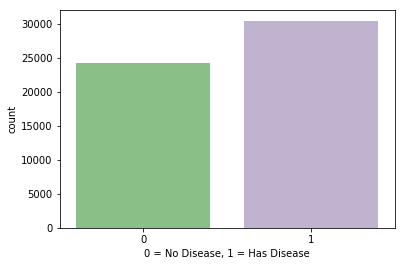

In [15]:
labelplot = sns.countplot(x = "label", data = df_combined, palette= 'Accent')
plt.xlabel ("0 = No Disease, 1 = Has Disease")
plt.show()

In [16]:
NoDiseaseTotal = len(df_combined[df_combined.label == 0])
YesDiseaseTotal = len(df_combined[df_combined.label == 1])
print("Percentage of Stool Samples that indicate No Disease: {:.2f}%"
      .format((NoDiseaseTotal / (len(df_combined.label))*100)))
print("Percentage of Stool Samples that indicate Disease: {:.2f}%"
      .format((YesDiseaseTotal / (len(df_combined.label))*100)))

Percentage of Stool Samples that indicate No Disease: 44.31%
Percentage of Stool Samples that indicate Disease: 55.69%


In [17]:
df_combined.groupby('label').mean()

,0,1,2,3,4,5,6,7,8,9,...,990,991,992,993,994,995,996,997,998,999
label,,,,,,,,,,,,,,,,,,,,,
0,9.590998e-07,0.002023,0.003708,0.000181,0.003851,0.000026,0.000631,0.000391,2.221834e-06,0.001252,...,0.000136,0.000119,0.002926,0.000243,0.000269,0.000949,0.000228,0.001488,0.000055,0.000062
1,2.238879e-06,0.001007,0.005822,0.000218,0.003221,0.000037,0.000723,0.000903,5.861113e-09,0.001273,...,0.000166,0.000136,0.002192,0.000061,0.000130,0.001155,0.000216,0.001678,0.000020,0.000012


## 4. Modelling

In [18]:
#splitting data to 70% training and 30%testing
y = df_combined.label.values
x = df_combined.drop(columns = ['user_id','label']).values
#note: could possibly drop some columns that are close to 0 (e10) to reduce dimensionality

x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.3, random_state = 0)


In [19]:
lr = LogisticRegression(solver='liblinear')
lr.fit(x_train,y_train)
print("Test Accuracy {:.2f}%".format(lr.score(x_test,y_test)*100))

Test Accuracy 75.96%


In [20]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(x_train, y_train)
print("Accuracy of Naive Bayes: {:.2f}%".format(nb.score(x_test,y_test)*100))

Accuracy of Naive Bayes: 67.47%


In [21]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier()
dtc.fit(x_train, y_train)
print("Decision Tree Test Accuracy {:.2f}%".format(dtc.score(x_test, y_test)*100))

Decision Tree Test Accuracy 66.65%


In [22]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators = 1000, random_state = 1)
rf.fit(x_train, y_train)
print("Random Forest Algorithm Accuracy Score : {:.2f}%".format(rf.score(x_test,y_test)*100))

Random Forest Algorithm Accuracy Score : 76.70%


## 5. Other forms of exploration


Because the highest accuracy is 76.70%, maybe there should be different parameters implemented.

In this section, I explore different approaches in an attempt to acheive a higher classification accuracy score.

Thought process:
1. Maybe reducing dimensionality will help -> easier visualization
2. Some microbes can affect activity of other microbes -> If I can look at just microbes that are independent of one another, it might lead to a better model
3. Some mircrobes have more activity than others -> maybe looking at those with higher activity will lead to a better model?

### 5a. PCA - Principal Component Analysis

In [23]:
#Using Orthogonal Transformation (PCA) to reduce dimensionality

from sklearn.decomposition import PCA
pca = PCA(n_components = 4)
components = pca.fit_transform(df_adjusted)
df_pca = pd.DataFrame(data = components, columns = ['pc1','pc2','pc3','pc4'])
df_pca.head()

,pc1,pc2,pc3,pc4
0,0.061047,-0.008915,-0.004472,0.014082
1,0.041462,-0.004099,-0.004163,-0.007505
2,-0.052257,-0.039844,-0.044862,0.003053
3,0.059724,-0.009392,0.001717,-0.008812
4,0.049181,-0.008872,0.001991,-0.017474


In [24]:
pca.explained_variance_ratio_

array([0.03282027, 0.02302498, 0.02027565, 0.00945754])

In [25]:
pca.explained_variance_ratio_.cumsum()

array([0.03282027, 0.05584525, 0.0761209 , 0.08557844])

In [26]:
#Only 3.28% of variance is explained by 1st component 
#and only 2.30% of variance is explained by 2nd component
#as a result, PCA is not a viable approach in reducing dimensions

#In another approach, I will begin checking to see if there are any trends in terms of microbial activity

### 5b.Top Ten

In [27]:
df_adjusted.sum(axis=0).sort_values(ascending = False)

68     637.776123
488    601.746094
596    574.869873
891    559.602173
536    526.348328
935    508.986511
974    472.385651
618    436.053436
504    426.997162
589    399.009979
869    394.071533
840    389.811523
819    382.831482
783    361.984100
413    360.425262
155    354.512817
11     343.041260
779    327.240356
569    320.586548
853    316.077515
792    315.963135
837    313.426178
345    312.126465
71     308.204468
517    299.292450
746    298.458832
229    298.287445
295    296.416138
394    285.215302
715    282.956116
          ...    
739      0.083317
389      0.083280
684      0.081177
897      0.074222
379      0.072885
331      0.069097
740      0.065363
8        0.054109
179      0.052877
96       0.051111
435      0.044854
166      0.044747
478      0.044739
322      0.043163
215      0.040223
361      0.040117
657      0.037552
769      0.026550
54       0.023626
444      0.016685
148      0.016306
440      0.011592
621      0.008786
653      0.006184
110      0

In [28]:
df_topten = df_adjusted[['68','488','596','891','536','935','974','618','504','589']]
frames = [df_id, df_label, df_topten]
df_ten = pd.concat(frames, axis = 1)
df_ten.head()

,user_id,label,68,488,596,891,536,935,974,618,504,589
0,546fd0a2-3ed1-11e9-af14-060058a8e501,1,0.034086,0.015487,0.048387,0.054008,0.000343,0.000092,0.049610,0.000000,0.0,0.003891
1,54921d88-3ed1-11e9-857c-060058a8e501,1,0.005675,0.000141,0.000914,0.016338,0.005996,0.000515,0.000029,0.000000,0.0,0.146276
2,547090fa-3ed1-11e9-b20e-060058a8e501,0,0.000000,0.000000,0.000000,0.001070,0.000000,0.000000,0.000000,0.000725,0.0,0.000000
3,54921180-3ed1-11e9-8bb6-060058a8e501,1,0.006098,0.025555,0.000000,0.091059,0.008108,0.016134,0.020413,0.000000,0.0,0.000100
4,548eff9a-3ed1-11e9-b691-060058a8e501,1,0.000636,0.009539,0.006677,0.002862,0.071542,0.000954,0.000000,0.000000,0.0,0.010493


In [29]:
df_ten.groupby('label').mean()

,68,488,596,891,536,935,974,618,504,589
label,,,,,,,,,,
0,0.011265,0.012851,0.010143,0.006228,0.010877,0.006180,0.008655,0.007662,0.005694,0.006099
1,0.011945,0.009502,0.010775,0.013390,0.008600,0.011769,0.008600,0.008199,0.009468,0.008228


In [30]:
df_ten.groupby('label').describe()

68                                                              \
         count      mean       std  min  25%       50%       75%       max   
label                                                                        
0      24273.0  0.011265  0.031421  0.0  0.0  0.000000  0.004252  0.480584   
1      30502.0  0.011945  0.032239  0.0  0.0  0.000001  0.005722  0.534443   

           488            ...  504                589                      \
         count      mean  ...  75%       max    count      mean       std   
label                     ...                                               
0      24273.0  0.012851  ...  0.0  0.363439  24273.0  0.006099  0.021295   
1      30502.0  0.009502  ...  0.0  0.544855  30502.0  0.008228  0.027304   

                                          
       min  25%  50%       75%       max  
label                                     
0      0.0  0.0  0.0  0.000531  0.355242  
1      0.0  0.0  0.0  0.001034  0.419953  

[2 rows x 80 columns]

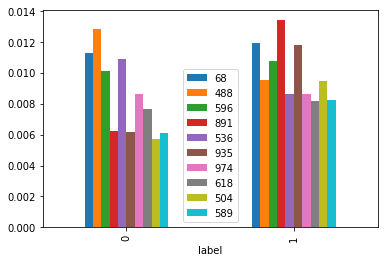

In [31]:
df_ten.groupby('label').mean().plot.bar()

In [32]:
y = df_ten.label.values
x = df_ten.drop(columns = ['user_id','label']).values
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.3, random_state = 0)

In [33]:
lr = LogisticRegression(solver='liblinear')
lr.fit(x_train,y_train)
print("Test Accuracy {:.2f}%".format(lr.score(x_test,y_test)*100))

Test Accuracy 57.59%


In [34]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(x_train, y_train)
print("Accuracy of Naive Bayes: {:.2f}%".format(nb.score(x_test,y_test)*100))

Accuracy of Naive Bayes: 52.11%


In [35]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier()
dtc.fit(x_train, y_train)
print("Decision Tree Test Accuracy {:.2f}%".format(dtc.score(x_test, y_test)*100))

Decision Tree Test Accuracy 55.94%


In [36]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 2)  # n_neighbors means k
knn.fit(x_train, y_train)
prediction = knn.predict(x_test)

print("{} NN Score: {:.2f}%".format(2, knn.score(x_test, y_test)*100))

2 NN Score: 52.60%


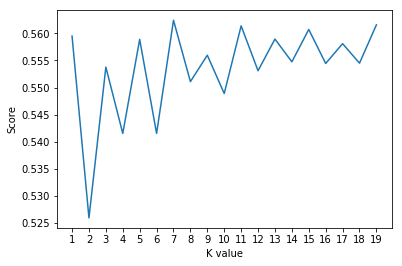

Maximum KNN Score is 56.24%


In [37]:
knnlist = []
for i in range(1,20):
    knn2 = KNeighborsClassifier(n_neighbors = i)
    knn2.fit(x_train, y_train)
    knnlist.append(knn2.score(x_test, y_test))
    
plt.plot(range(1,20), knnlist)
plt.xticks(np.arange(1,20,1))
plt.xlabel("K value")
plt.ylabel("Score")
plt.show()


print("Maximum KNN Score is {:.2f}%".format((max(knnlist))*100))

In [38]:
#Consistently getting accuracy scores less than 60% using topten
#Due to time contraints for further exploration:
#it is better to improve accuracy scores during the first attempt with some minor tweaks

### 5c.Tweaking 1st model

In [39]:
#to filter out the microbes that have very little activity
df_ascending = df_adjusted.reindex(df_adjusted.sum(axis=0).sort_values(ascending = False).index, axis = 1)
frames = [df_id, df_label, df_ascending]
df_sorted = pd.concat(frames, axis = 1)
df_sorted = df_sorted.iloc[:,:-200]

In [40]:
#drop rows with duplicate id's or NA data if any
df_sorted = df_sorted.drop_duplicates(subset = 'user_id')
df_sorted = df_sorted.dropna()


In [41]:
df_sorted.head()

,user_id,label,68,488,596,891,536,935,974,618,...,264,305,537,386,886,629,19,58,388,745
0,546fd0a2-3ed1-11e9-af14-060058a8e501,1,0.034086,0.015487,0.048387,0.054008,0.000343,0.000092,0.049610,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,54921d88-3ed1-11e9-857c-060058a8e501,1,0.005675,0.000141,0.000914,0.016338,0.005996,0.000515,0.000029,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,547090fa-3ed1-11e9-b20e-060058a8e501,0,0.000000,0.000000,0.000000,0.001070,0.000000,0.000000,0.000000,0.000725,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,54921180-3ed1-11e9-8bb6-060058a8e501,1,0.006098,0.025555,0.000000,0.091059,0.008108,0.016134,0.020413,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,548eff9a-3ed1-11e9-b691-060058a8e501,1,0.000636,0.009539,0.006677,0.002862,0.071542,0.000954,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [42]:
y = df_sorted.label.values
x = df_sorted.drop(columns = ['user_id','label']).values
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.3, random_state = 0)

In [43]:
lr = LogisticRegression(solver='liblinear')
lr.fit(x_train,y_train)
print("Test Accuracy {:.2f}%".format(lr.score(x_test,y_test)*100))

Test Accuracy 77.49%


In [44]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(x_train, y_train)
print("Accuracy of Naive Bayes: {:.2f}%".format(nb.score(x_test,y_test)*100))

Accuracy of Naive Bayes: 69.72%


In [45]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier()
dtc.fit(x_train, y_train)
print("Decision Tree Test Accuracy {:.2f}%".format(dtc.score(x_test, y_test)*100))


Decision Tree Test Accuracy 61.60%


## 6.Conclusion

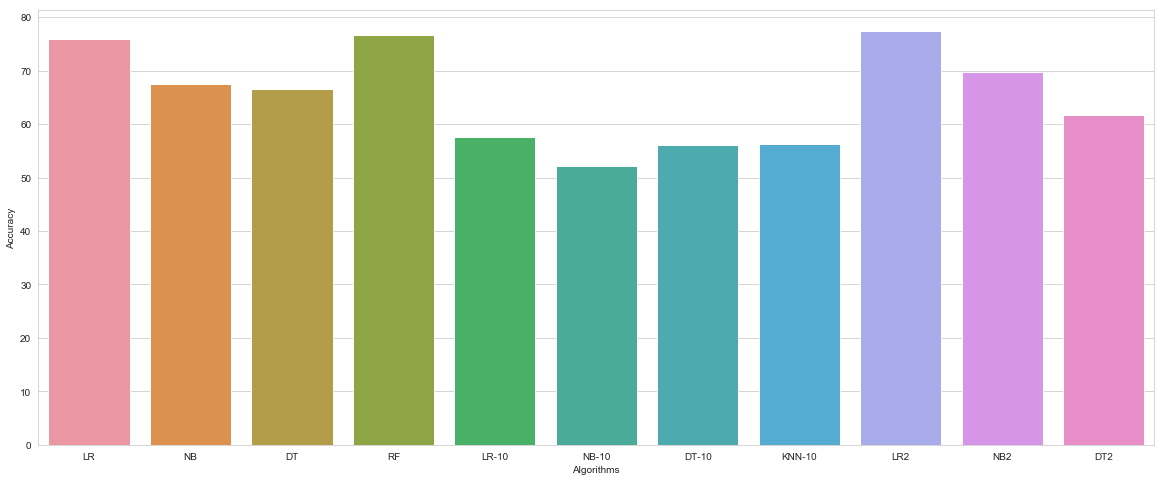

In [46]:
classifications = ["LR", "NB", "DT", "RF", "LR-10", "NB-10","DT-10", "KNN-10", "LR2", "NB2", "DT2"]
accuracy = [75.96, 67.47, 66.62, 76.70, 57.59, 52.11, 56.11, 56.24, 77.49, 69.72, 61.64]


sns.set_style("whitegrid")
plt.figure(figsize=(20,8))
plt.yticks(np.arange(0,100,10))
plt.ylabel("Accuracy")
plt.xlabel("Algorithms")
sns.barplot(x=classifications, y=accuracy)
plt.show()

Out of the all the different methods attempted for this assessment, the logistic regression led to the highest accuracy of 77.49%.
The confusion matrix for logistic regression classification model is shown below: 

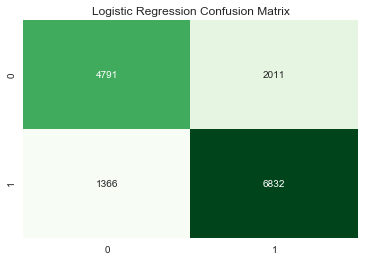

In [47]:
from sklearn.metrics import confusion_matrix
y_head_lr = lr.predict(x_test)
confusion_lr = confusion_matrix(y_test,y_head_lr)
plt.title("Logistic Regression Confusion Matrix")
sns.heatmap(confusion_lr,annot=True,cmap="Greens",fmt="d",cbar=False)
plt.show()

In the second attempt at modelling the dataset, I was able to improve the classification accuracy from 75.96% to 77.49%. Through this assessment, I found that using the top ten microbes that show the most activity was not a good indicator in determining whether or not the individual would have disease X. 

In the allotted time given, this is my analysis of the Microbiome data. If given more time, I would continue to explore the data- things such as: 1. Which microbes show strong activity in those with diasease, but weak activity in those with no disease? - and only model with this data 2. Which microbes occur the most in those with diease? - and only model with this data 3. Which microbes are the most common in both? - and filter those out of the data. I would also continue tweaking the logistic regression classification method: one thing I would try is adjusting the hyperparameters, optimizers, and regularization weight through grid search. All in all, this assessment was fun and I will continue exploring this dataset on my own free time.